In [1]:
# importing useful libraries    
import pandas as pd
import yfinance as yf

In [2]:
#importing SNP dataframe
data = yf.download('^GSPC', start = '2018-11-14', end='2024-11-15')
data.to_csv('snp500_one_year.csv')

[*********************100%***********************]  1 of 1 completed


In [3]:
# display dataframe information
print(data.shape)

(1510, 6)


In [4]:
# display tail of df
print(data.tail())

Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2024-11-08 00:00:00+00:00  5995.540039  5995.540039  6012.450195  5976.759766   
2024-11-11 00:00:00+00:00  6001.350098  6001.350098  6017.310059  5986.689941   
2024-11-12 00:00:00+00:00  5983.990234  5983.990234  6009.919922  5960.080078   
2024-11-13 00:00:00+00:00  5985.379883  5985.379883  6008.189941  5965.910156   
2024-11-14 00:00:00+00:00  5949.169922  5949.169922  5993.879883  5942.279785   

Price                             Open      Volume  
Ticker                           ^GSPC       ^GSPC  
Date                                                
2024-11-08 00:00:00+00:00  5976.759766  4666740000  
2024-11-11 00:00:00+00:00  6008.859863  4333000000  
2024-11-12 00:00:00+00:00  6003.600098  4243400000  
2024-11-13 00:00:00+00:00  5985.7

In [5]:
# Get rid of non useful columns
data = data.drop(columns = ["Open","High","Low","Close"])

In [6]:
# display the columns
data.columns

MultiIndex([('Adj Close', '^GSPC'),
            (   'Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [7]:
# modify the indexes
data = data.reset_index()
data = data[['Date', 'Adj Close', 'Volume']]

In [8]:
# change the date format
data['Date'] = pd.to_datetime(data['Date']).dt.date

In [9]:
# display the dataset columns
data.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close', '^GSPC'),
            (   'Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [10]:
# reset the columns of the dataset
data.columns = ['Date', 'Adj Close', 'Volume']

In [11]:
# reset the index of the dataset
data.set_index('Date', inplace=True)

In [12]:
# adding the returns to be able to calculate other indicators (vol...)
data['Returns'] = data['Adj Close'].pct_change()

In [13]:
# import the VIX data from yfinance
vix_data = yf.download('^VIX', start='2018-11-14', end='2024-11-15')

[*********************100%***********************]  1 of 1 completed


In [14]:
# display the vix dataset
print(vix_data)

Price                      Adj Close      Close       High        Low  \
Ticker                          ^VIX       ^VIX       ^VIX       ^VIX   
Date                                                                    
2018-11-14 00:00:00+00:00  21.250000  21.250000  22.360001  19.299999   
2018-11-15 00:00:00+00:00  19.980000  19.980000  22.969999  19.940001   
2018-11-16 00:00:00+00:00  18.139999  18.139999  21.360001  18.100000   
2018-11-19 00:00:00+00:00  20.100000  20.100000  20.990000  18.520000   
2018-11-20 00:00:00+00:00  22.480000  22.480000  23.809999  20.370001   
...                              ...        ...        ...        ...   
2024-11-08 00:00:00+00:00  14.940000  14.940000  15.330000  14.660000   
2024-11-11 00:00:00+00:00  14.970000  14.970000  15.560000  14.890000   
2024-11-12 00:00:00+00:00  14.710000  14.710000  15.370000  14.690000   
2024-11-13 00:00:00+00:00  14.020000  14.020000  15.260000  13.770000   
2024-11-14 00:00:00+00:00  14.310000  14.310000  14

In [15]:
# get rid of the useless columns
vix_data.drop(columns=["Close","High","Low","Open","Volume"])

Price,Adj Close
Ticker,^VIX
Date,
2018-11-14 00:00:00+00:00,21.250000
2018-11-15 00:00:00+00:00,19.980000
2018-11-16 00:00:00+00:00,18.139999
2018-11-19 00:00:00+00:00,20.100000
2018-11-20 00:00:00+00:00,22.480000
...,...
2024-11-08 00:00:00+00:00,14.940000
2024-11-11 00:00:00+00:00,14.970000


In [16]:
# have the same format as our main dataset to merge it correctly
vix_data = vix_data.reset_index()
vix_data = vix_data[['Date', 'Adj Close']]

In [17]:
# change the format date
vix_data['Date'] = pd.to_datetime(vix_data['Date']).dt.date

In [18]:
# put date as index
vix_data.set_index('Date', inplace=True)

In [19]:
# only want one column
vix_data.columns = ['Adj Close']

In [20]:
#merging main dataset and vix dataset
data = pd.merge(data,vix_data,on="Date",how="left")

In [21]:
# rename the columns of the main dataset
data = data.rename(columns={
    'Adj Close_x': 'S&P 500 Adj Close Price',
    'Adj Close_y': 'VIX Adj Close Price',
    'Volume': 'Volume S&P 500'
})

In [22]:
# import the data from yf
tnx_data = yf.download('^TNX', start='2018-11-14', end='2024-11-15')
fed_data = yf.download('^IRX', start='2018-11-14', end='2024-11-15')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [23]:
# get rid of the useless columns
fed_data.drop(columns=["Close","High","Low","Open","Volume"])
tnx_data.drop(columns=["Close","High","Low","Open","Volume"])

Price,Adj Close
Ticker,^TNX
Date,
2018-11-14 00:00:00+00:00,3.120
2018-11-15 00:00:00+00:00,3.118
2018-11-16 00:00:00+00:00,3.074
2018-11-19 00:00:00+00:00,3.057
2018-11-20 00:00:00+00:00,3.048
...,...
2024-11-08 00:00:00+00:00,4.306
2024-11-11 00:00:00+00:00,4.308


In [24]:
# get rid of the weird index format
tnx_data = tnx_data.reset_index()
fed_data = fed_data.reset_index()

In [25]:
# keep only useful columns
tnx_data = tnx_data[['Date', 'Close']]
fed_data = fed_data[['Date', 'Close']]

In [26]:
# change the date format
tnx_data['Date'] = pd.to_datetime(tnx_data['Date']).dt.date
fed_data['Date'] = pd.to_datetime(fed_data['Date']).dt.date

In [27]:
# 
tnx_data.set_index('Date', inplace=True)
fed_data.set_index('Date', inplace=True)

In [28]:
# only want one column
tnx_data.columns = ['Adj Close']
fed_data.columns = ['Adj Close']

In [29]:
fed_data.tail()

,Adj Close
Date,
2024-11-08,4.423
2024-11-11,4.415
2024-11-12,4.423
2024-11-13,4.390
2024-11-14,4.383


In [30]:
# merge main dataset and fed_data
data=pd.merge(data,fed_data,on="Date",how="left")

In [31]:
# rename the column in the main dataset
data = data.rename(columns={
    'Adj Close': 'FED Rates',
})

In [32]:
# merge main dataset and tnx_data
data = pd.merge(data,tnx_data,on="Date",how="left")

In [33]:
# rename the column in the main dataset
data = data.rename(columns={
    'Adj Close': '10 Y Treasury Rates',
})

In [34]:
#adding Volume Weighted Average Price
data["VWAP"] = (data['S&P 500 Adj Close Price'] * data['Volume S&P 500']).cumsum() / data['Volume S&P 500'].cumsum()

In [35]:
#adding spread between 10 Y Treasury Bunds Rates and FED Rates
data['Spread_10Y_Fed'] = data['10 Y Treasury Rates'] - data['FED Rates']

In [36]:
#adding SMA (Simple Moving Average) and EMA (Exponential Moving Average)
data['SMA_10'] = data['S&P 500 Adj Close Price'].rolling(window=10).mean()
data['EMA_10'] = data['S&P 500 Adj Close Price'].ewm(span=10).mean()

In [37]:
# adding Bollinger bounds on 10 last days (volatility measure)
rolling_mean = data['S&P 500 Adj Close Price'].rolling(window=10).mean()
rolling_std = data['S&P 500 Adj Close Price'].rolling(window=10).std()
data['Bollinger_Upper'] = rolling_mean + 2 * rolling_std
data['Bollinger_Lower'] = rolling_mean - 2 * rolling_std

In [38]:
# adding sharpe ration on 10 last days
rolling_returns = data['Returns'].rolling(window=10)
data['Sharpe_10'] = rolling_returns.mean() / rolling_returns.std()

In [39]:
# get rid of the 10 first rows
data = data.iloc[10:]

In [40]:
# display head of data
data.tail()

,S&P 500 Adj Close Price,Volume S&P 500,Returns,VIX Adj Close Price,FED Rates,10 Y Treasury Rates,VWAP,Spread_10Y_Fed,SMA_10,EMA_10,Bollinger_Upper,Bollinger_Lower,Sharpe_10
Date,,,,,,,,,,,,,
2024-11-08,5995.540039,4666740000,0.003757,14.94,4.423,4.306,3934.552132,-0.117,5829.748975,5863.042240,6040.308074,5619.189875,0.286892
2024-11-11,6001.350098,4333000000,0.000969,14.97,4.415,4.308,3935.952235,-0.107,5847.531982,5888.189124,6084.175027,5610.888938,0.271452
2024-11-12,5983.990234,4243400000,-0.002893,14.71,4.423,4.432,3937.310040,0.009,5862.639014,5905.607507,6113.968777,5611.309250,0.228504
2024-11-13,5985.379883,4220180000,0.000232,14.02,4.390,4.451,3938.659546,0.061,5879.810010,5920.111576,6139.591012,5620.029008,0.262744
2024-11-14,5949.169922,4184570000,-0.006050,14.31,4.383,4.418,3939.972268,0.035,5904.181982,5925.394911,6135.423465,5672.940500,0.462806


In [41]:
# Check for the NaN values in my dataset
print(data.isna().sum())

S&P 500 Adj Close Price    0
Volume S&P 500             0
Returns                    0
VIX Adj Close Price        0
FED Rates                  0
10 Y Treasury Rates        0
VWAP                       0
Spread_10Y_Fed             0
SMA_10                     0
EMA_10                     0
Bollinger_Upper            0
Bollinger_Lower            0
Sharpe_10                  0
dtype: int64


In [42]:
# understand the nature of the data
data.dtypes 

S&P 500 Adj Close Price    float64
Volume S&P 500               int64
Returns                    float64
VIX Adj Close Price        float64
FED Rates                  float64
10 Y Treasury Rates        float64
VWAP                       float64
Spread_10Y_Fed             float64
SMA_10                     float64
EMA_10                     float64
Bollinger_Upper            float64
Bollinger_Lower            float64
Sharpe_10                  float64
dtype: object

In [43]:
# we want to erase the time dependence and set the index as just a counter of rows
data.reset_index(inplace =True)

In [44]:
data.head()

,Date,S&P 500 Adj Close Price,Volume S&P 500,Returns,VIX Adj Close Price,FED Rates,10 Y Treasury Rates,VWAP,Spread_10Y_Fed,SMA_10,EMA_10,Bollinger_Upper,Bollinger_Lower,Sharpe_10
0,2018-11-29,2737.800049,3599200000,-0.002183,18.790001,2.310,3.035,2696.798141,0.725,2691.878979,2698.227137,2777.397385,2606.360574,0.107745
1,2018-11-30,2760.169922,4668310000,0.008171,18.070000,2.308,3.013,2703.374130,0.705,2694.875977,2710.603192,2788.115169,2601.636784,0.090382
2,2018-12-03,2790.370117,4221580000,0.010941,16.440001,2.288,2.992,2710.837355,0.704,2700.285986,2726.258987,2809.166069,2591.405904,0.153509
3,2018-12-04,2700.060059,4515710000,-0.032365,20.740000,2.365,2.924,2709.931499,0.559,2701.218994,2721.190192,2809.894846,2592.543142,0.028606
4,2018-12-06,2695.949951,5180430000,-0.001522,21.190001,2.353,2.876,2708.701895,0.523,2706.625000,2716.363138,2807.265313,2605.984687,0.141898


In [45]:
# import libraries needed to implement our new categorical variables that relate to the dates

import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

In [46]:
# adding categorical variables based on dates (month, weekday, if it's a bank holiday) to break free from time dependency

data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Weekday'] = pd.to_datetime(data['Date']).dt.dayofweek  # Monday=0, Sunday=6
data['Is_Bank_Holiday'] = pd.to_datetime(data['Date']).isin(USFederalHolidayCalendar().holidays())

In [47]:
#adding categorical variable if it is a vacation

data['Is_Vacation'] = pd.to_datetime(data['Date']).apply(
    lambda x: (x.month == 12 and x.day >= 24) or (x.month == 1 and x.day <= 2)
)

In [48]:
# converting boolean values into numerical values

data['Is_Bank_Holiday'] = data['Is_Bank_Holiday'].astype(int)
data['Is_Vacation'] = data['Is_Vacation'].astype(int)

In [49]:
# get rid of the date column to get rid of time dependency

data.drop(columns=['Date'], inplace=True)

In [50]:
data.head(20)

,S&P 500 Adj Close Price,Volume S&P 500,Returns,VIX Adj Close Price,FED Rates,10 Y Treasury Rates,VWAP,Spread_10Y_Fed,SMA_10,EMA_10,Bollinger_Upper,Bollinger_Lower,Sharpe_10,Month,Weekday,Is_Bank_Holiday,Is_Vacation
0,2737.800049,3599200000,-0.002183,18.790001,2.310,3.035,2696.798141,0.725,2691.878979,2698.227137,2777.397385,2606.360574,0.107745,11,3,0,0
1,2760.169922,4668310000,0.008171,18.070000,2.308,3.013,2703.374130,0.705,2694.875977,2710.603192,2788.115169,2601.636784,0.090382,11,4,0,0
2,2790.370117,4221580000,0.010941,16.440001,2.288,2.992,2710.837355,0.704,2700.285986,2726.258987,2809.166069,2591.405904,0.153509,12,0,0,0
3,2700.060059,4515710000,-0.032365,20.740000,2.365,2.924,2709.931499,0.559,2701.218994,2721.190192,2809.894846,2592.543142,0.028606,12,1,0,0
4,2695.949951,5180430000,-0.001522,21.190001,2.353,2.876,2708.701895,0.523,2706.625000,2716.363138,2807.265313,2605.984687,0.141898,12,3,0,0
5,2633.080078,4242240000,-0.023320,23.230000,2.340,2.850,2703.621652,0.510,2704.940015,2700.584455,2810.254773,2599.625256,-0.029771,12,4,0,0
6,2637.719971,4162880000,0.001762,22.639999,2.330,2.856,2699.545909,0.526,2705.456006,2688.764552,2809.233996,2601.678016,0.019257,12,0,0,0
7,2636.780029,3963440000,-0.000356,21.760000,2.370,2.879,2696.055596,0.509,2701.789014,2679.050584,2812.924055,2590.653973,-0.078867,12,1,0,0
8,2651.070068,4029300000,0.005420,21.459999,2.375,2.906,2693.648529,0.531,2698.679028,2673.848312,2813.918926,2583.439131,-0.065067,12,2,0,0
9,2650.540039,3978340000,-0.000200,20.650000,2.363,2.911,2691.485354,0.548,2689.354028,2669.532450,2803.455989,2575.252068,-0.244553,12,3,0,0


In [51]:
# check for NaN values

print(data.isnull().sum())

S&P 500 Adj Close Price    0
Volume S&P 500             0
Returns                    0
VIX Adj Close Price        0
FED Rates                  0
10 Y Treasury Rates        0
VWAP                       0
Spread_10Y_Fed             0
SMA_10                     0
EMA_10                     0
Bollinger_Upper            0
Bollinger_Lower            0
Sharpe_10                  0
Month                      0
Weekday                    0
Is_Bank_Holiday            0
Is_Vacation                0
dtype: int64


In [52]:
# import library to standardize variables

from sklearn.preprocessing import StandardScaler

In [53]:
# list of columns to standardize

cols_to_standardize = [
    "S&P 500 Adj Close Price",
    "Volume S&P 500",
    "VIX Adj Close Price",
    "FED Rates",
    "10 Y Treasury Rates",
    "VWAP",
    "Spread_10Y_Fed",
    "SMA_10",
    "EMA_10",
    "Bollinger_Upper",
    "Bollinger_Lower"
]

In [54]:
# scaler initialization

scaler = StandardScaler()

In [55]:
# applying standardization to my dataset

data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])

In [56]:
data.head()

,S&P 500 Adj Close Price,Volume S&P 500,Returns,VIX Adj Close Price,FED Rates,10 Y Treasury Rates,VWAP,Spread_10Y_Fed,SMA_10,EMA_10,Bollinger_Upper,Bollinger_Lower,Sharpe_10,Month,Weekday,Is_Bank_Holiday,Is_Vacation
0,-1.480252,-0.632549,-0.002183,-0.222355,-0.022333,0.369660,-1.526346,0.522385,-1.534519,-1.528235,-1.539739,-1.521039,0.107745,11,3,0,0
1,-1.453469,0.409573,0.008171,-0.312870,-0.023292,0.352474,-1.509770,0.502284,-1.530905,-1.513299,-1.526914,-1.526750,0.090382,11,4,0,0
2,-1.417311,-0.025880,0.010941,-0.517785,-0.032880,0.336069,-1.490957,0.501279,-1.524381,-1.494403,-1.501723,-1.539119,0.153509,12,0,0,0
3,-1.525436,0.260825,-0.032365,0.022790,0.004032,0.282946,-1.493240,0.355553,-1.523256,-1.500521,-1.500851,-1.537744,0.028606,12,1,0,0
4,-1.530357,0.908766,-0.001522,0.079362,-0.001721,0.245448,-1.496340,0.319372,-1.516736,-1.506347,-1.503998,-1.521494,0.141898,12,3,0,0


In [57]:
# importing useful libraries to perform Random Forest Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
# Preparing variables for model

X = data.drop(columns=["S&P 500 Adj Close Price"])  
y = data["S&P 500 Adj Close Price"]

In [59]:
#preparing model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
#initializing random forest model

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [61]:
# training model

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
# prediciting on test variable

y_pred = rf_model.predict(X_test)

In [63]:
# evaluating performances

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 0.03895279653506159
R²: 0.9983869916166143


In [64]:
# example of prediction

print("Some predictions :")
for i in range(5):
    print(f"True : {y_test.iloc[i]}, Predicted : {y_pred[i]}")

Some predictions :
True : 0.17361314504924205, Predicted : 0.17881384618901652
True : 1.484509878297498, Predicted : 1.4599183054522715
True : -0.773901626599777, Predicted : -0.8144641105139386
True : -0.884181760754375, Predicted : -0.8688431665335595
True : -0.7047955720015995, Predicted : -0.7233695622686713


In [65]:
# import libraries to compute good regression metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats

In [66]:
# computing right metrics to evaluate the predictions and thus the model

residuals = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
z_scores = stats.zscore(residuals)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"Average of the residual Z-scores: {np.mean(z_scores)}")
print(f"Standard error the the residual Z-scores: {np.std(z_scores)}")

RMSE: 0.03895279653506159
MAE: 0.026807339558940435
R²: 0.9983869916166143
Average of the residual Z-scores: -1.1842378929335004e-17
Standard error the the residual Z-scores: 1.0


Understanding what we're doing, criticizing our job and then trying to define what we're going to do next.

Here our RandomForestRegression Model provides a very high R² which leads me to worry about overfitting so I could think of testing it on another dataset or even think about some methods like Ridge or Lasso.

Also, my model assumes that the relationships between features are constant in time which is a strong assumption and could be solved by using other variables or models like neural network.

Moreover, extrapolation could be difficult because the model focuses on past data but it is norma since it is the only data we can base ourselves on. One solution could be to test the model on realistic future periods or even use more dynamic models that ajust the model parameters with newer data.

Talking about optimizing the parameters, we're now going to try and use GridCV to think about and try to choose the right parameters for our model.

In [67]:
# trying to find out what the best parameters are for our random forest regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best parameters : {grid_search.best_params_}")
print(f"Best score : {-grid_search.best_score_}")

c:\Users\kyama\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters : {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score : 0.001885328235550518


Now let's think about the core strategy of my project. 

Here I am trying to predict the future price of the S&P 500 index. Here Thus, I've used a Random Forest which is a model that we've studied in class but here I used the regression way instead of the Random Forest Classification because what I have here is a regression problem becuse of what I'm trying to predict. 

An idea would be to try to think about implementing other models we've seen in class by changing the aim of the project and turning it into a classification problem, at leat for the sake of the stage 2, in order to use models we've studied in class. Here, what I would be trying to predict would be if the S&P 500 stock woul rather go up or down. 

In further stages I'll then be able to comeback to more difficult and deep regression models such as SVMs, XGBoost... by coming back to my initial regression problem.

Alright, as mentioned above I'm going to change my regression into a classification problem and try to implement first a simple model such as Logistic Regression to see the outputs and results I get to see what I'll try to do next to enhance my results.

In [68]:
# creating a categorical variable to tell if the price of the stock will go up or down
data['Target'] = (data['Returns'] > 0).astype(int)

In [69]:
# checking the class distribution
print(data['Target'].value_counts())

Target
1    817
0    683
Name: count, dtype: int64


In [70]:
# setting the variables for the model implementation
features = [
    'S&P 500 Adj Close Price', 'Volume S&P 500', 'VIX Adj Close Price',
    'FED Rates', '10 Y Treasury Rates', 'VWAP', 'Spread_10Y_Fed',
    'SMA_10', 'EMA_10', 'Bollinger_Upper', 'Bollinger_Lower',
    'Sharpe_10', 'Month', 'Weekday', 'Is_Bank_Holiday', 'Is_Vacation'
]
X = data[features]
y = data['Target']

In [71]:
# separating the model and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# implementing the model and printing the results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Precision:", precision_score(y_test, y_pred))
print("Logistic Regression Recall:", recall_score(y_test, y_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.62
Logistic Regression Precision: 0.6129032258064516
Logistic Regression Recall: 0.7307692307692307
Logistic Regression F1 Score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       144
           1       0.61      0.73      0.67       156

    accuracy                           0.62       300
   macro avg       0.62      0.62      0.61       300
weighted avg       0.62      0.62      0.61       300



Ok so here we printed the results of our first model after having transformed it into a classification problem. The model used here was a rather simple one to begin. I chose to use a Logistic Regression model which assumes linear relationship between features and the probability to belong to a certain class. The problem here is that the model doesn't catch the complex relationships between features. We can easily see it by looking at the accuracy score that there is a lot of room for improvement. The precision score shows that the model is good for the positive class (price rises) but struggles predicting for the negative class surely because the model doesn't capture complex enough relationships. The low recall score also points out that the model still fails to miss some elements from the positive class. Thus, I will try to enhance my results by implementing a bagging and then a boosting model.

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=10,
    random_state=42
)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

print(classification_report(y_test, y_pred_bagging))
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging Precision:", precision_score(y_test, y_pred_bagging))
print("Bagging Recall:", recall_score(y_test, y_pred_bagging))
print("Bagging F1 Score:", f1_score(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50       144
           1       0.58      0.72      0.64       156

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.57       300
weighted avg       0.58      0.58      0.57       300

Bagging Accuracy: 0.5833333333333334
Bagging Precision: 0.5803108808290155
Bagging Recall: 0.717948717948718
Bagging F1 Score: 0.6418338108882522


Here we understand that the bagging model, even though it is able to capture more complex relationships, seems less appropriate to this dataset. Here the problem might come from an imbalance between classes, maybe because of trees not deep enough. One issue might also be overfitting and that would be why Logistic Regression performs better because it doesn't overadjust sub-samples.

In [74]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(
    n_estimators=50,
    random_state=42
)
boosting_model.fit(X_train, y_train)

y_pred_boosting = boosting_model.predict(X_test)
print(classification_report(y_test, y_pred_boosting))
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("Boosting Precision:", precision_score(y_test, y_pred_boosting))
print("Boosting Recall:", recall_score(y_test, y_pred_boosting))
print("Boosting F1 Score:", f1_score(y_test, y_pred_boosting))

c:\Users\kyama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.62      0.47      0.53       144
           1       0.60      0.74      0.66       156

    accuracy                           0.61       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.61      0.61      0.60       300

Boosting Accuracy: 0.6066666666666667
Boosting Precision: 0.5989583333333334
Boosting Recall: 0.7371794871794872
Boosting F1 Score: 0.6609195402298851


Okay so let's try to understand why the boosting model isn't capturing well the relationships between features. Among those models, Logistic Regression is the more adapted but is limited for the minority class. The problem of bagging is that it doesn't provide any significative improvement and is less performing for the minority class. The boosting model shows clear improvements for the minority class thanks to the bias and error reduction provided by this type of model. One idea for the next improvements would be to try to improve the boosting parameters and hyperparameters to see how the results evolve. Another idea would be to try to improve the Logistic Regression by also changing the parameters and adjsuting the weights of the under represented class. Also, I could also think of implementing other advanced models like XGBoost or GradientBoosting. 

My first idea to increase my scores for the models is to increase the number of rows in my datasets. Until now, I have been using the S&P 500 data from 1 year ago making my dataset only have 253 rows. I've now understood that my models might perform better if I have around 1000 rows for my models to be trained on richer data. Thus, I will take the S&P 500 data from 2018 to see how the model evolves.

Let's understand and criticize the results of each model using the S&P 500 data from 5 years ago until this year.

Here, Logistic Regression still remains the best performing over the other models like AdaBoost, Bagging and Boosting methods.
Let's try to understand where the issue might come from because our models' accuracy is still low even with a bigger numer of data.

In [75]:
# Class counting
class_counts = data['Target'].value_counts()
print("Class distribution :\n", class_counts)

# Class proportion
class_proportions = data['Target'].value_counts(normalize=True)
print("\nClass proportion :\n", class_proportions)

Class distribution :
 Target
1    817
0    683
Name: count, dtype: int64

Class proportion :
 Target
1    0.544667
0    0.455333
Name: proportion, dtype: float64


We can see here that the classes are relatively well balanced. We can understand well here why Logistic Regression works well an is an appropriate model for the dataset.

Let's try here to implement a more advanced model which is XGBoost in order to see if it can correct the bagging and boosting limitations by capturing better the complex relationships between the features of my dataset. We will also try to determine the right hyperparameters to reduce the variance and bias.

In [76]:
# implementing and testing the XG Boost Model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("XGBoosting Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoosting Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoosting Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoosting F1 Score:", f1_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55       144
           1       0.61      0.74      0.67       156

    accuracy                           0.62       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.62      0.62      0.61       300

XGBoosting Accuracy: 0.6166666666666667
XGBoosting Precision: 0.6084656084656085
XGBoosting Recall: 0.7371794871794872
XGBoosting F1 Score: 0.6666666666666666


With the XGBoost we have a better recall than for other models, but it goes with the decrease of accuracy as we've seen in class it depends on the Machine Learning problem we are dealing with. Here we would like to have a higher accuracy than recall because in Time Series Forecasting questions, having a low recall isn't a huge problem compared to Health and Cancer models for example, because having a false negative in Time Series corresponds to predicting that the price goes down but in reality it went up, which is way less a problem than for cancer.

In [77]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters list
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5]  
}

# GridSearch Initialization
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Model Evaluation
y_pred_optimized = best_model.predict(X_test)
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 1}
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.31      0.41       144
           1       0.56      0.83      0.67       156

    accuracy                           0.58       300
   macro avg       0.59      0.57      0.54       300
weighted avg       0.59      0.58      0.54       300



c:\Users\kyama\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [78]:
print(classification_report(y_test, y_pred_optimized))
print("XGBoosting Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("XGBoosting Precision:", precision_score(y_test, y_pred_optimized))
print("XGBoosting Recall:", recall_score(y_test, y_pred_optimized))
print("XGBoosting F1 Score:", f1_score(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       0.62      0.31      0.41       144
           1       0.56      0.83      0.67       156

    accuracy                           0.58       300
   macro avg       0.59      0.57      0.54       300
weighted avg       0.59      0.58      0.54       300

XGBoosting Accuracy: 0.5766666666666667
XGBoosting Precision: 0.5633187772925764
XGBoosting Recall: 0.8269230769230769
XGBoosting F1 Score: 0.6701298701298701


Here, optimizing the hyperparameters of the XGBoost model has increased a lot the recall which would be great in another application but here the problem is the accuracy which has decreased with the parameters optimization. Thus, what I will do now is try to optimize the parameters and hyperparameters for the Logistic Regression.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Définir la grille d’hyperparamètres
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            # Régularisation
    'solver': ['liblinear', 'lbfgs', 'saga'], # Optimiseurs
    'penalty': ['l2'],                       # Type de pénalité (l2 est le plus commun)
    'class_weight': [None, 'balanced']       # Gestion du déséquilibre
}

# Modèle Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Recherche par validation croisée
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Meilleure accuracy
print("Meilleure accuracy (CV) :", grid_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres : {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleure accuracy (CV) : 0.7233333333333334


In [80]:
# Take the best model and train/test the optimized model

best_logreg = grid_search.best_estimator_

best_logreg.fit(X_train, y_train)

y_pred_logopti = best_logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_logopti))
print("Logistic Regression Optimized Accuracy:", accuracy_score(y_test, y_pred_logopti))
print("Logistic Regression Optimized Precision:", precision_score(y_test, y_pred_logopti))
print("Logistic Regression Optimized Recall:", recall_score(y_test, y_pred_logopti))
print("Logistic Regression Optimized F1 Score:", f1_score(y_test, y_pred_logopti))

              precision    recall  f1-score   support

           0       0.72      0.56      0.63       144
           1       0.66      0.80      0.72       156

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.69      0.68      0.68       300

Logistic Regression Optimized Accuracy: 0.6833333333333333
Logistic Regression Optimized Precision: 0.6613756613756614
Logistic Regression Optimized Recall: 0.8012820512820513
Logistic Regression Optimized F1 Score: 0.7246376811594203


We can see here that we have a good increase in accuracy compared to all my previous models, but also in the recall which is a good improvement compared to the Logistic Regression ran without the optimized hyperparameters. Let's try to understand and explain the reasons why Optimized Logistic Regression provides the best results for accuracy. Here, the dataset I'm using might have some linear relationships that the LogisticRegression model captures easily. Also, optimizing the hyperparameters allowed to reduce significantly overfitting (what we've seen with the F-1 score before and after hyperparameter optimization) and enhancing generalization.

What I will now try to do is to continue optimizing my Logistic Regression Model and last I will try to implement a model that's outside the scope of this course that could be a Deep Learning Model such as Neuronal Network.

In [81]:
# Using SMOTE to rebalance classes

from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


print("Distribution des classes avant SMOTE :")
print(y_train.value_counts())
print("\nDistribution des classes après SMOTE :")
print(y_train_smote.value_counts())

Distribution des classes avant SMOTE :
Target
1    661
0    539
Name: count, dtype: int64

Distribution des classes après SMOTE :
Target
0    661
1    661
Name: count, dtype: int64


In [82]:
# testing the optimized model after SMOTE

best_logreg.fit(X_train_smote, y_train_smote)

y_pred_logoptismote = best_logreg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_test, y_pred_logoptismote))
print("Logistic Regression Optimized Smote Accuracy:", accuracy_score(y_test, y_pred_logoptismote))
print("Logistic Regression Optimized SmotePrecision:", precision_score(y_test, y_pred_logoptismote))
print("Logistic Regression Optimized Smote Recall:", recall_score(y_test, y_pred_logoptismote))
print("Logistic Regression Optimized Smote F1 Score:", f1_score(y_test, y_pred_logoptismote))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       144
           1       0.71      0.72      0.72       156

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300

Logistic Regression Optimized Smote Accuracy: 0.7
Logistic Regression Optimized SmotePrecision: 0.70625
Logistic Regression Optimized Smote Recall: 0.7243589743589743
Logistic Regression Optimized Smote F1 Score: 0.7151898734177216


Here, I used SMOTE to rebalance classes and managed to increase the accuracy of my model to 0.7 but this was possible by reducing the recall score which is not a huge problem as I explained before. I'm going to try to keep optimizing the model.

In [83]:
# optimizing hyperparameters using elasticnet

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],          
    'l1_ratio': [0.1, 0.5, 0.9],            
    'solver': ['saga'],                     
    'penalty': ['elasticnet']               
}

grid_search = GridSearchCV(estimator=best_logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

best_model = grid_search.best_estimator_

y_pred_best_model = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best_model))
print("Logistic Regression Optimized Smote elsaticnet Accuracy:", accuracy_score(y_test, y_pred_best_model))
print("Logistic Regression Optimized Smote elasticnet Precision:", precision_score(y_test, y_pred_best_model))
print("Logistic Regression Optimized Smote elasticnet Recall:", recall_score(y_test, y_pred_best_model))
print("Logistic Regression Optimized Smote elasticnet F1 Score:", f1_score(y_test, y_pred_best_model))




Fitting 5 folds for each of 15 candidates, totalling 75 fits
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       144
           1       0.69      0.69      0.69       156

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300

Logistic Regression Optimized Smote elsaticnet Accuracy: 0.68
Logistic Regression Optimized Smote elasticnet Precision: 0.6948051948051948
Logistic Regression Optimized Smote elasticnet Recall: 0.6858974358974359
Logistic Regression Optimized Smote elasticnet F1 Score: 0.6903225806451613


c:\Users\kyama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Using Elasticnet to optimize even more the parameters was not the best solution because it reduced the accuracy of the model. This might be linked to the previous of SMOTE that can make Elasticnet's regularisation less effective because it might try to adjust artificial parameters

After having optimized a lot my Logistic Regression, I will try to go further and implement a Deep Learning algorithm which is Neural Network algorithm to see how it compares to my Regression model.

In [84]:
# implementing the Neural Network Model

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Intializing model
model = Sequential()

# Adding layers
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  
model.add(Dropout(0.3))  
model.add(Dense(32, activation='relu'))  
model.add(Dropout(0.3))  
model.add(Dense(1, activation='sigmoid'))  

# Model Compilation
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='binary_crossentropy',  
              metrics=['accuracy']) 

y_train_NN = np.array(y_train_smote)
y_test_NN = np.array(y_test)

# Model training
history = model.fit(X_train_scaled, y_train_NN, 
                    validation_data=(X_test_scaled, y_test_NN), 
                    epochs=50,  
                    batch_size=32,  
                    verbose=1)

y_pred_NN = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Rapport de classification :\n", classification_report(y_test_NN, y_pred_NN))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_NN))
print("Neural Network Precision:", precision_score(y_test, y_pred_NN))
print("Neural Network Recall:", recall_score(y_test, y_pred_NN))
print("Neural Network F1 Score:", f1_score(y_test, y_pred_NN))

c:\Users\kyama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4857 - loss: 0.7311 - val_accuracy: 0.5567 - val_loss: 0.6827
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5627 - loss: 0.6784 - val_accuracy: 0.6100 - val_loss: 0.6680
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6290 - loss: 0.6588 - val_accuracy: 0.5900 - val_loss: 0.6575
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6109 - loss: 0.6555 - val_accuracy: 0.5900 - val_loss: 0.6545
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6265 - loss: 0.6427 - val_accuracy: 0.5800 - val_loss: 0.6515
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6063 - loss: 0.6592 - val_accuracy: 0.5733 - val_loss: 0.6521
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6118 - loss: 0.6550 - val_accuracy: 0.5933 - val_loss: 0.6499
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6322 - loss: 0.6468 - val_accuracy: 0.5667 - val_loss

In [85]:
# optimizing the parameters by ponderation of the loss function

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_NN), y=y_train_NN)
class_weights = dict(enumerate(class_weights))
model.fit(X_train_scaled, y_train_NN, validation_data=(X_test_scaled, y_test_NN), 
          epochs=50, batch_size=32, verbose=1, class_weight=class_weights)

y_pred_NN = (model.predict(X_test_scaled) > 0.5).astype(int)

print("Rapport de classification :\n", classification_report(y_test_NN, y_pred_NN))
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_NN))
print("Neural Network Precision:", precision_score(y_test, y_pred_NN))
print("Neural Network Recall:", recall_score(y_test, y_pred_NN))
print("Neural Network F1 Score:", f1_score(y_test, y_pred_NN))

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6483 - loss: 0.6194 - val_accuracy: 0.5567 - val_loss: 0.6547
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6389 - loss: 0.6064 - val_accuracy: 0.5600 - val_loss: 0.6523
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.6052 - val_accuracy: 0.5700 - val_loss: 0.6531
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6526 - loss: 0.6128 - val_accuracy: 0.5600 - val_loss: 0.6558
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6555 - loss: 0.6178 - val_accuracy: 0.5733 - val_loss: 0.6523
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6835 - loss: 0.6016 - val_accuracy: 0.5600 - val_loss: 0.6582
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.6038 - val_accuracy: 0.5600 - val_loss: 0.6575
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.6178 - val_accuracy: 0.5633 - val_loss:

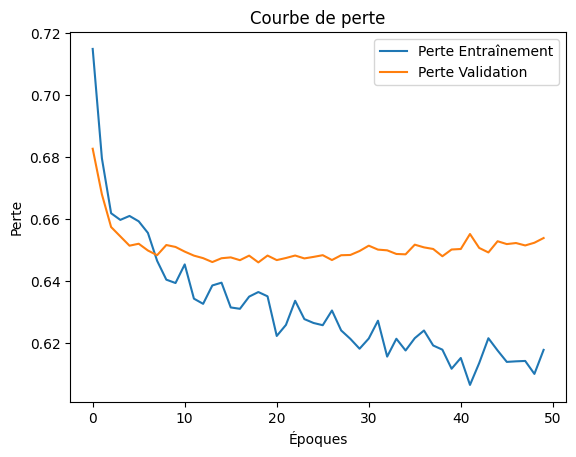

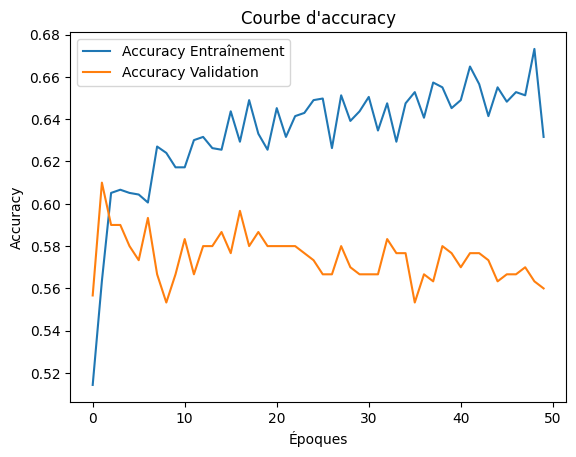

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.title('Courbe de perte')
plt.show()

plt.plot(history.history['accuracy'], label='Accuracy Entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy Validation')
plt.xlabel('Époques')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbe d\'accuracy')
plt.show()

Here we can easily see that the neural Network doesn't adapt to the dataset with a very small level of accuracy even when trying to optimize the hyperparameters. One reason is that algorithms like Neural Networks require bigger datasets to be able to generalize which is the reason why Logistic Regression performs well here. Also, Neural Network might be too complex for no reason because in my dataset there might not be too complicated relationships between my features. 

Let's now try to understand better why Logistic Regression provided the best results after being optimized. It is a simple model and performs well with linear relationships. The features I created in the beginning were thus adapted and very useful. Using SMOTE allowed to rebalance the classes in a way that made the accuracy, recall and thus generalization increase. 

To go further and keep updating the model, I can think of 2 solutions : either continue enhancing the Logistic Regression model since it is a simple one it is well adapted to my problem and to capture tendancies. Either choose another Deep Learning method well known for this type of problems such as LSTMs (Long Short Term Memory) that could be an idea for a further to model.